В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы


Загрузим данные, проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

**Сколько уникальных рекламных кампаний было проведено?**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [104]:
conversion = pd.read_csv('/Users/pavel/Desktop/karpov/7 СТАТИСТИКА/2.9 conversion.csv')
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [105]:
conversion.xyz_campaign_id.nunique()

3

Посмотрим на данные и их описание

In [106]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


clicks - `Дискретная`	
gender - `номинативная`	
total_conversion - `Дискретная`				
spent - `Непрерывная`	
interest - `номинативная`	
age - `ранговая/порядковая`	
approved_conversion	- `Дискретная`
impressions - `Дискретная`

Дискретная номинативная ранговая/порядковая

**Построим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.**

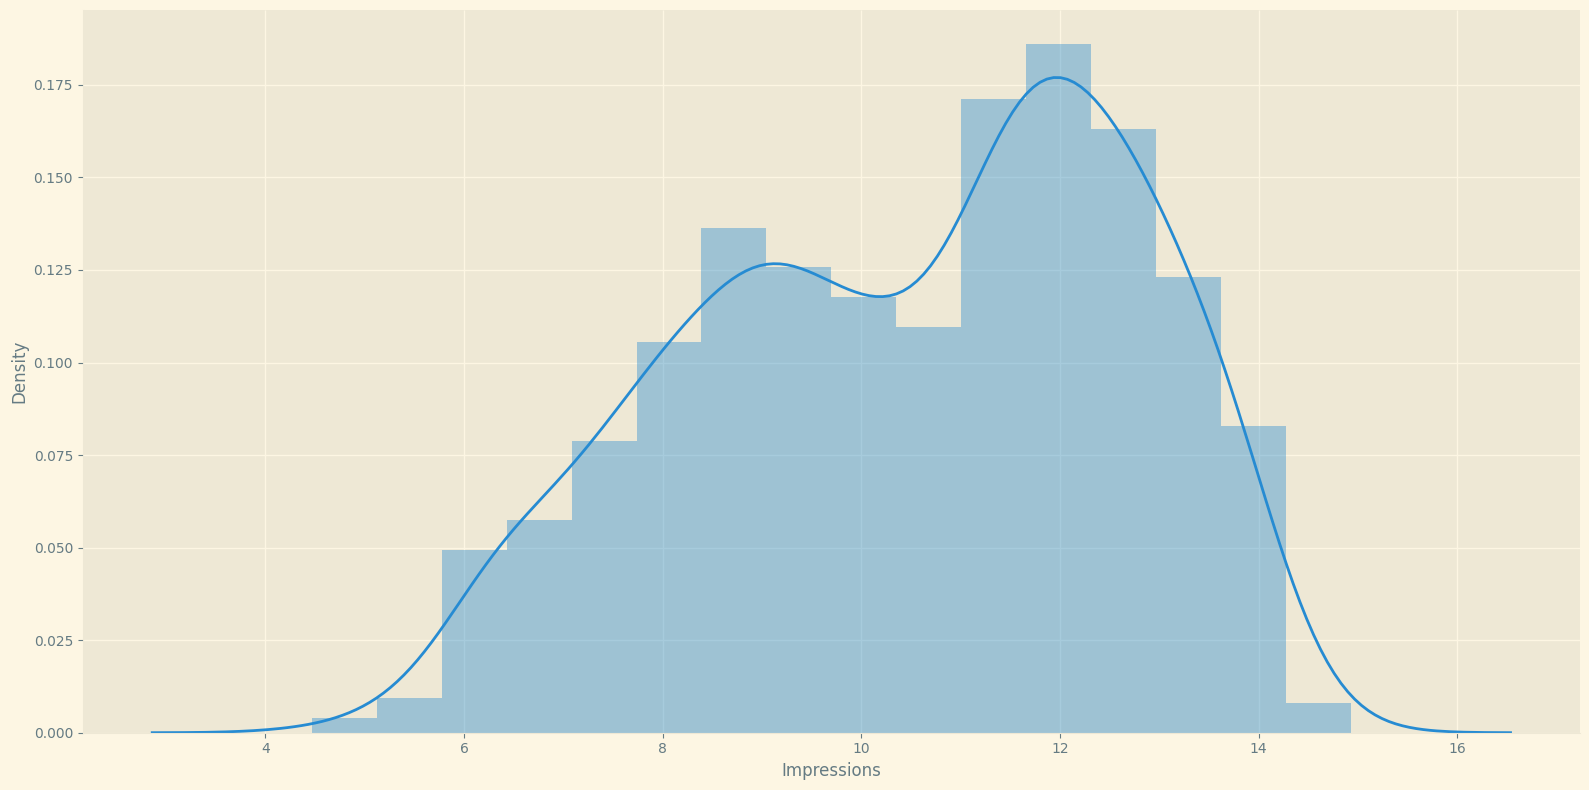

In [107]:
plt.figure(figsize=(16,8))
sns.distplot(np.log(conversion.Impressions), kde = True)
plt.tight_layout()
sns.despine()

* **Распределение бимодальное**
* **Полученное распределение не является нормальным**

**Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.**

CTR= clicks / impressions

In [108]:
conversion_CTR = conversion.groupby('ad_id', as_index = False).agg({'Clicks' : 'sum', 'Impressions': 'sum'})
conversion_CTR.head()

,ad_id,Clicks,Impressions
0,708746,1,7350
1,708749,2,17861
2,708771,0,693
3,708815,1,4259
4,708818,1,4133


In [109]:
conversion['CTR'] = conversion_CTR.Clicks / conversion_CTR.Impressions
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [110]:
conversion.ad_id.iloc[conversion['CTR'].idxmax()]

738637

Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).

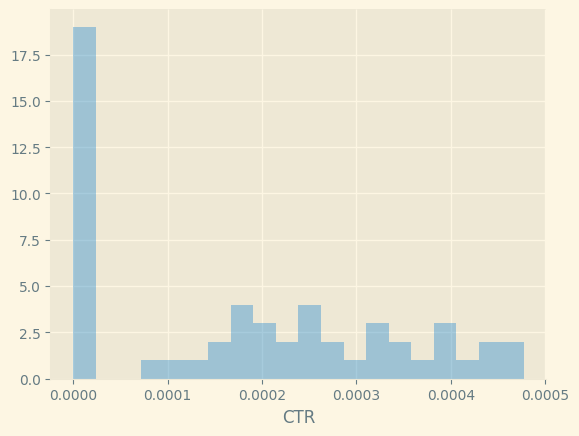

In [111]:
sns.distplot(conversion.query("xyz_campaign_id == 916").CTR, bins = 20, kde = False)
sns.despine()

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:**

CPC= spent / clicks

**Выведем описательные статистики для новой переменной, посмотрите на форму распределения.**

In [112]:
spent_clicks = conversion.groupby('ad_id', as_index = False).agg({'Spent': 'sum', 'Clicks': 'sum'})
spent_clicks.head()

,ad_id,Spent,Clicks
0,708746,1.43,1
1,708749,1.82,2
2,708771,0.00,0
3,708815,1.25,1
4,708818,1.29,1


In [113]:
conversion['CPC'] = spent_clicks.Spent / spent_clicks.Clicks

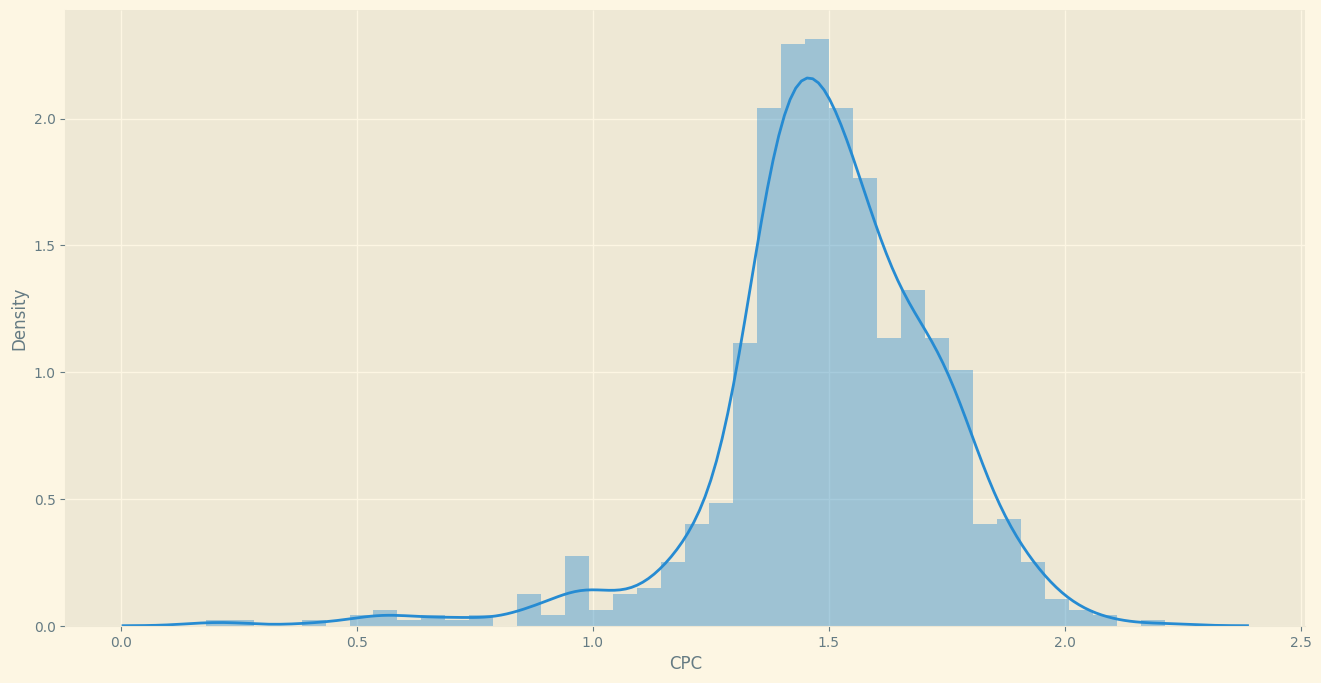

In [114]:
plt.figure(figsize=(16,8))
sns.distplot(conversion['CPC'].dropna())
sns.despine()

In [115]:
ss.iqr(conversion['CPC'], nan_policy='omit').round(2)

0.25

**Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления.**

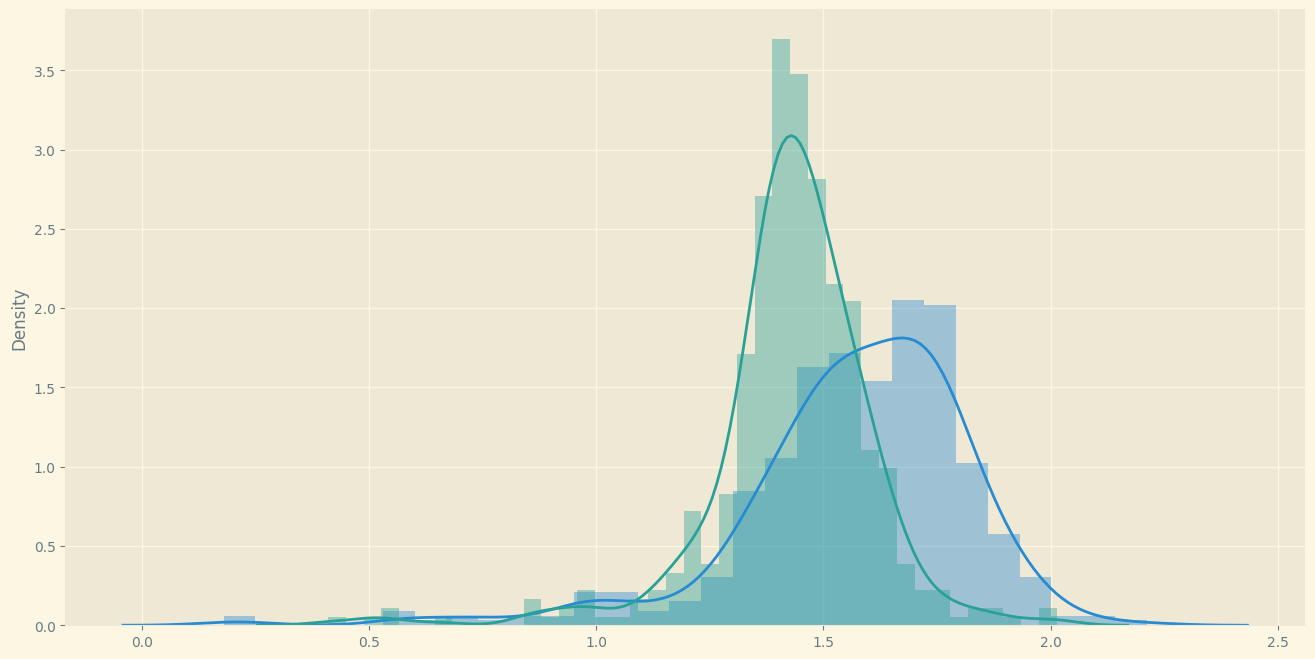

In [116]:
plt.figure(figsize=(16,8))
sns.distplot(x = conversion.query("gender == 'M'").CPC, kde = True)
sns.distplot(x = conversion.query("gender == 'F'").CPC, kde = True)
sns.despine()

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.**

**Посчитаем конверсию из клика в покупку.
Note: клики – Clicks, покупки – Approved_Conversion.**

In [132]:
clicks_conversion = conversion.groupby('ad_id', as_index = False)\
    .agg({'Clicks': 'sum', 'Approved_Conversion':'sum'})
clicks_conversion.head()

,ad_id,Clicks,Approved_Conversion
0,708746,1,1
1,708749,2,0
2,708771,0,0
3,708815,1,0
4,708818,1,1


In [133]:
conversion['CR'] = clicks_conversion.Approved_Conversion / clicks_conversion.Clicks * 100
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481


In [135]:
conversion.query('ad_id == 1121814').CR.round(2)

860    3.09
Name: CR, dtype: float64

Ответ: `3.09`